# Assignment 4 - Simple Linear Regression - Salary Hike

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Step 1 : Importing Data

In [3]:
df = pd.read_csv('C:/Users/LENOVO/Desktop/Assignment Data Science/4th/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Step 2 : EDA

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Step 3 : Plotting Data for oulier detection

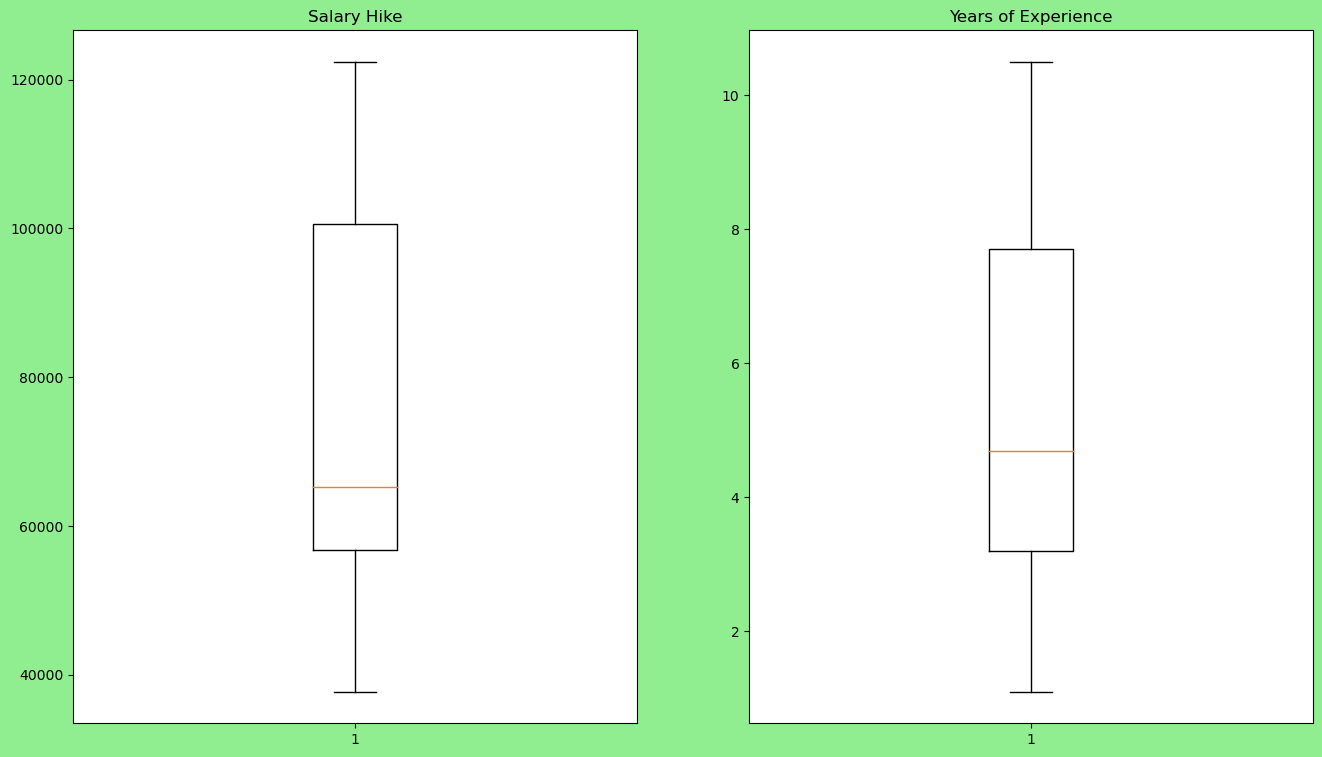

In [8]:
plt.figure(figsize=(16,9), facecolor='lightgreen')
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')

plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')

plt.show()

### The above boxplots shows that, there is no outliers available in data.

# Step 4 : Data Visualization

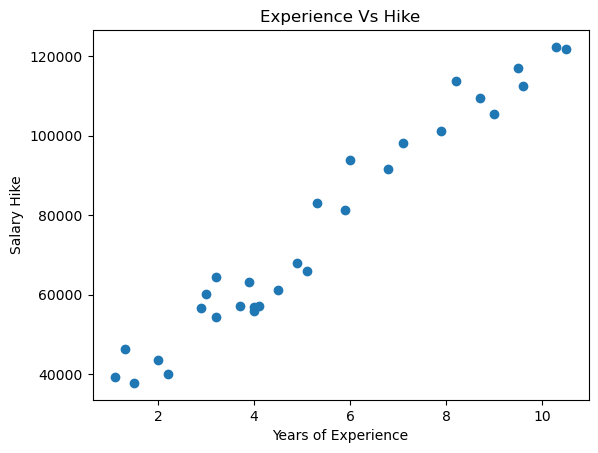

In [9]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.title('Experience Vs Hike')
plt.show()

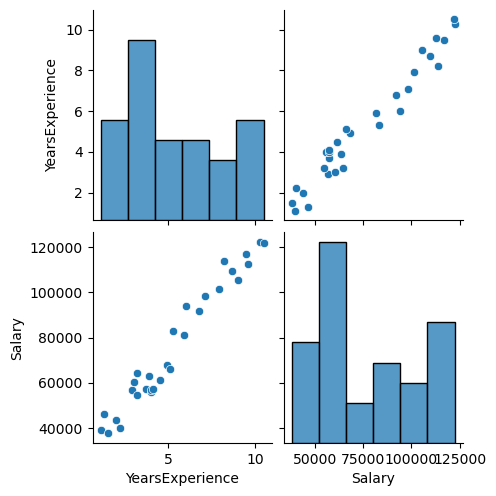

In [10]:
# Pairplots
sns.pairplot(df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

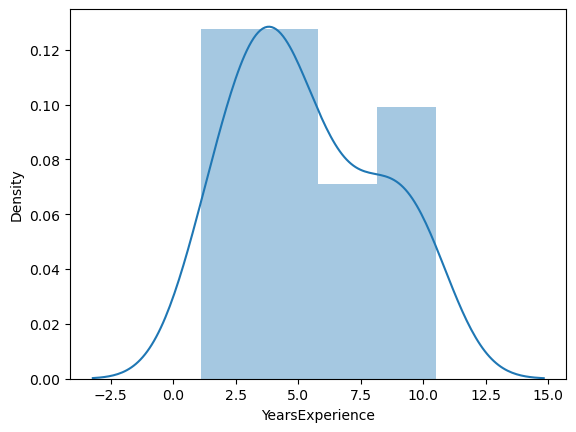

In [11]:
sns.distplot(df['YearsExperience'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

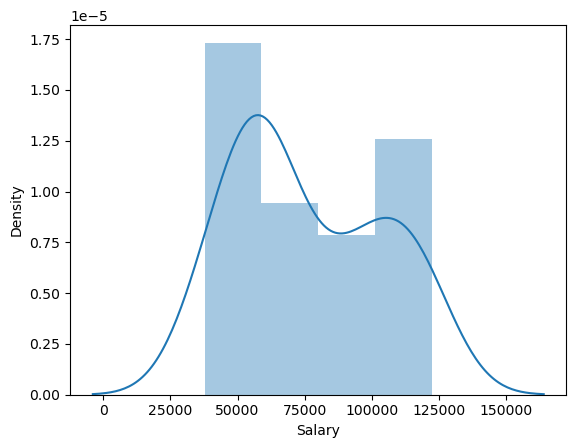

In [12]:
sns.distplot(df['Salary'])

### As we can see, there is no outlier in the data.

# Step 5 : Checking Correlation between variables

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

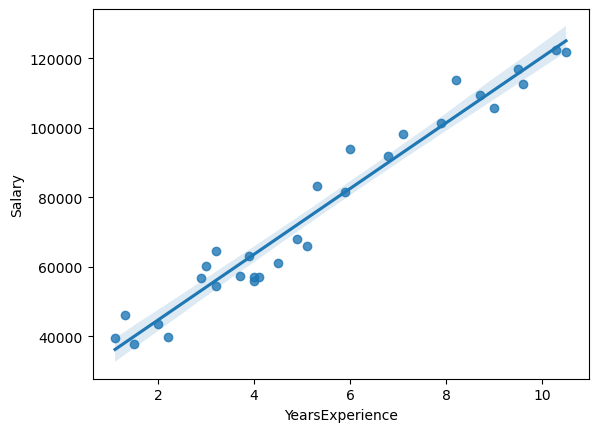

In [14]:
sns.regplot(x = df['YearsExperience'], y = df['Salary'])

### As, we can see above, there is very strong positive correlation between two variables. The score is more than 0.80, which is a god sign.

# Step 6  - Create Simple Linear Regression Model

### It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares of the difference between the observed and predicted values of the dependent variable configured as a straight line

In [15]:
model_1 = smf.ols('Salary ~ YearsExperience', data= df).fit()

In [16]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        00:14:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
model_1.predict(df['YearsExperience'])

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

## As you can notice in the above model
#### 1. The R-squared and Adjusted R-squared scores are above 0.85.
#### 2. F-statitics is quite high as well and yes desire it to be higher
#### 3. But log-likelihood is quite very low far away from 0
#### 4. AIC and BIC score are much higher for this model
#### Lets Try some data transformation to check whether these scores can get any better than this.

# Model_2 : Square root transformation of data.


In [19]:
model_2 = smf.ols('np.sqrt(Salary) ~ np.sqrt(YearsExperience)',data = df).fit()

In [20]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           7.58e-19
Time:                        00:14:46   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## As per above model, we can see below conclusions
#### 1. Rsquared value is still greater than 0.85, which is good.
#### 2. AIC and BIC values got reduced than previous model.
#### 3. Log-Likelihood got better than before and close to 0.
#### We will try some other transformation, whether we get more better results.

# Model_3 : Cube root transformation of data

In [21]:
model_3 = smf.ols('np.cbrt(Salary) ~ np.cbrt(YearsExperience)',data = df).fit()

In [22]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           6.37e-18
Time:                        00:14:53   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model_4 : Log transformation of predictor variable

In [23]:
model_4 = smf.ols('Salary ~ np.log(YearsExperience)', data = df).fit()

In [24]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        00:15:00   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This model doen not give better results comparing with previous two models. we will try some other combination.

# Model_5 : Log transformation of data

In [25]:
model_5 = smf.ols('np.log(Salary) ~ np.log(YearsExperience)', data= df).fit()

In [26]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                        00:15:07   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This model gives better solution for all criterias discussed above.

# Step 7: Model Selection

### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.
### Comparing different models with respect to the Root Mean Squared Errors

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
model1_pred_y = model_1.predict(df['YearsExperience'])
model2_pred_y = np.square(model_2.predict(df['YearsExperience']))
model3_pred_y = np.power(model_3.predict(df['YearsExperience']),3)
model4_pred_y = model_4.predict(df['YearsExperience'])
model5_pred_y = np.exp(model_5.predict(df['YearsExperience']))

In [29]:
model1_rmse = np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse = np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse = np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
model4_rmse = np.sqrt(mean_squared_error(df['Salary'], model4_pred_y))
model5_rmse = np.sqrt(mean_squared_error(df['Salary'], model5_pred_y))

print('model_1=', model1_rmse,'\n' 'model_2=', model2_rmse,'\n' 'model_3=', model3_rmse,'\n' 'model_4=', model4_rmse,'\n' 'model_5=', model5_rmse)

model_1= 5592.043608760662 
model_2= 5960.647096174306 
model_3= 6232.815455835857 
model_4= 10302.893706228302 
model_5= 7219.716974372746


In [30]:
rmse = {'model_1=': model1_rmse, 'model_2=': model2_rmse, 'model_3=': model3_rmse, 'model_4=': model4_rmse, 'model_5=': model5_rmse}
min(rmse, key=rmse.get)

'model_1='

# As model_1 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model_1 to predict our values